In [34]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [50]:
%matplotlib inline

# Parse Raw Data
Raw data format:
StockName tab FocusedStock tab otherStock

In [1]:
ls

 Volume in drive C is Systems
 Volume Serial Number is 6071-AB08

 Directory of C:\Users\Anakin\Documents\StockNetwork

08/04/2017  09:58 PM    <DIR>          .
08/04/2017  09:58 PM    <DIR>          ..
08/04/2017  09:58 PM    <DIR>          .ipynb_checkpoints
08/02/2017  08:00 PM           176,726 Russel 3000 stock 2.xlsx
08/04/2017  09:37 PM    <DIR>          russel_3000
08/02/2017  08:00 PM        16,961,741 russel_3000.zip
08/04/2017  09:58 PM                72 Stock Network.ipynb
               3 File(s)     17,138,539 bytes
               4 Dir(s)  175,110,320,128 bytes free


In [3]:
testfile = "./russel_3000/russel_10000.txt"
# read all content as string and split it by line break,\n
rawdata = open(testfile).read().split("\n") 

In [5]:
rawdata2 = [i.split("\t") for i in rawdata]

In [6]:
rawdata2

[['ETF1', 'XLY', 'XLP', 'XLI', 'XLB', 'XLV', 'XLK'],
 ['ETF2', 'XLP', 'XLY', 'XLI', 'XLB', 'XLV', 'XLU'],
 ['ETF3', 'XLE', 'XLF', 'XLV', 'XLK', 'XLU', 'XLB'],
 ['ETF4', 'XLF', 'XLK', 'XLE', 'XLV', 'XLI', 'XLB'],
 ['ETF5', 'XLV', 'XLP', 'XLY', 'XLI', 'XLK', 'XLB'],
 ['ETF6', 'XLI', 'XLB', 'XLY', 'XLP', 'XLV', 'XLK'],
 ['ETF7', 'XLB', 'XLI', 'XLY', 'XLP', 'XLU', 'XLV'],
 ['ETF8', 'XLRE', 'XLFS', 'XLY', 'XLI', 'XLP', 'XLB'],
 ['ETF9', 'XLK', 'XLI', 'XLV', 'XLY', 'XLP', 'XLB'],
 ['ETF10', 'XLU', 'XLP', 'XLB', 'XLI', 'XLY', 'XLV'],
 ['1-800 FLOWERS COM', 'FLWS', 'ABTL', 'STMP', 'OSTK', 'FTD', 'NILE'],
 ['1ST SOURCE CORP', 'SRCE', 'THFF', 'CTBI', 'LKFN', 'BANF', 'STBA'],
 ['21ST CENTURY FOX CL A', 'FOXA', 'NWSA', 'DISCA', 'VIAB', 'LBTYA', 'CBS'],
 ['21ST CENTURY FOX CL B', 'FOX', 'NWS', 'VIA', 'TWX', 'DIS', 'FOXA'],
 ['2U INC', 'TWOU', 'ZEN', 'PCTY', 'HUBS', 'QTWO', 'PAYC'],
 ['3D SYSTEMS CORP', 'DDD', 'SSYS', 'XONE', 'ONVO', 'VJET', 'SCTY'],
 ['3M CO', 'MMM', 'UTX', 'PG', 'DD', 'JNJ', 'CAT'

In [17]:
len(rawdata2)

3013

# Create a Map from stock code to stock name
first item in raw data is stock name, the second one is stock code
The unique key here is stock code, for example:

    CENTRAL GARDEN & PET CO
    GREIF INC
    RUSH ENTERPRISES INC
Those three companies have two stock codes

In [29]:
stockdict = dict()
for i in rawdata2:
    try:
        stockdict[i[1]]=i[0]
    except:
        print(i)

['']


In [30]:
len(stockdict)

3012

Get the companies that have more than one stock code

In [20]:
import collections

In [24]:
test2 = [i[0] for i in rawdata2]

In [25]:
test = collections.Counter(test2)

In [26]:
for i in test:
    if test[i]!=1:
        print(i)

CENTRAL GARDEN & PET CO
GREIF INC
RUSH ENTERPRISES INC


# Get the Company that are not in the Focusedstock


In [35]:
focusedstock = set(stockdict.keys())

In [37]:
rawdata2[0][2:]

['XLP', 'XLI', 'XLB', 'XLV', 'XLK']

In [40]:
tmp = [i[2:] for i in rawdata2]
appearedstock = [i for sublist in tmp for i in sublist]

In [53]:
notappeared = set(appearedstock)-set(stockdict.keys())

About 1000 companies have appeared in the People also watch list, but not in the Focused Stock.

In [54]:
notappeared?

In [47]:
ha = np.array(list(collections.Counter(appearedstock).values()))

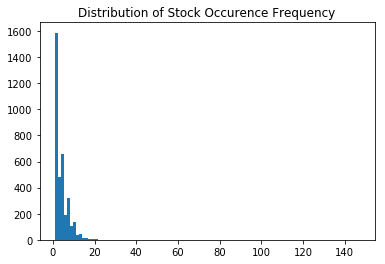

In [60]:
plt.hist(ha,bins=100)
plt.title("Distribution of Stock Occurence Frequency")
plt.show()

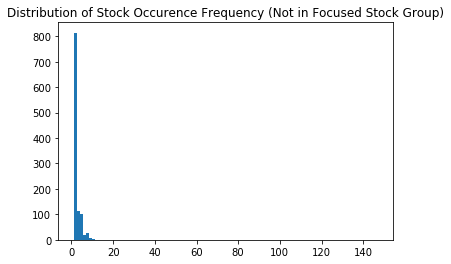

In [63]:
frequency = collections.Counter(appearedstock)
ha2 = np.array([frequency[i] for i in notappeared])
plt.hist(ha2,bins=100)
plt.title("Distribution of Stock Occurence Frequency (Not in Focused Stock Group)")
plt.show()

# Import into a Network and Visualize it
Read Data from Rawdata2.

The graph here should be directed graph.

Weight: 5 4 3 2 1.

if the number of relevant stocks is under 5, for example, 4, the weights here are set as 5,4,3,2.

In [74]:
testGraph = nx.DiGraph()

图添加边的逻辑（方向）

FB->GOOL means that in the FB stock website, people also watch GOOL stock

In [75]:
for i in rawdata2:
    try:
        for j in range(2,len(i)):
            if i[j] in stockdict.keys():
                testGraph.add_edge(i[1],i[j],weight=7-j)
    except:
        print(i)

此处两个数值2832和3012数值不相等，说明存在一部分股票，其仅有的相关股票不在所有关注的股票当中。

表现在图中就是存在一部分孤立的点

In [76]:
len(testGraph.nodes())

2832

In [77]:
len(stockdict)

3012

In [72]:
collections.Counter([len(i) for i in rawdata2])

Counter({1: 1, 3: 147, 7: 2865})

In [81]:
len(testGraph.edges())

12020

In [65]:
rawdata2[0]

['ETF1', 'XLY', 'XLP', 'XLI', 'XLB', 'XLV', 'XLK']

C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Anakin\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Anakin\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

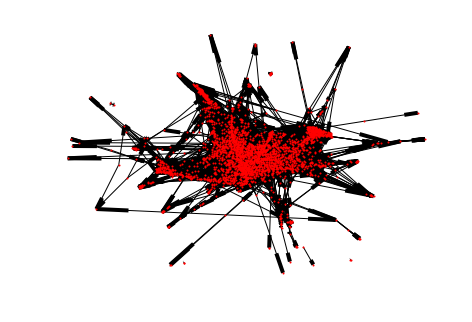

In [80]:
nx.draw(testGraph,node_size=1)

# Connected Components
To undirected graph, connected.

to directed graph, strongly connected.

In [86]:
nx.number_strongly_connected_components(testGraph)

552

In [83]:
testGraph_undirected = testGraph.to_undirected()

In [84]:
ConnectedPart = [len(c) for c in sorted(nx.connected_components(testGraph_undirected), key=len, reverse=True)]

In [85]:
ConnectedPart

[2814, 10, 2, 2, 2, 2]

# Cal Some Network Variable

## PageRank

In [87]:
pagerankresult = nx.pagerank(testGraph)

In [88]:
pagerankresult

{'XLY': 0.0006881159088858526,
 'XLP': 0.0006554333192592182,
 'XLI': 0.0006953157388523947,
 'XLB': 0.0005632737613162665,
 'XLV': 0.00040193933977818115,
 'XLK': 0.00021036248843658321,
 'XLU': 0.00016257153520455269,
 'XLE': 7.030117739201231e-05,
 'XLF': 7.354882809989453e-05,
 'XLRE': 5.3629828755721396e-05,
 'FLWS': 0.0001738770960059293,
 'STMP': 0.00015514014888878944,
 'OSTK': 0.00010862910823281947,
 'FTD': 9.865345613218407e-05,
 'SRCE': 0.0019823860571330423,
 'THFF': 0.0016264618749735054,
 'CTBI': 0.002079248573983525,
 'LKFN': 0.0029811347267360345,
 'BANF': 0.003300507690545271,
 'STBA': 0.0014754400421076504,
 'FOXA': 0.0002122963567778135,
 'NWSA': 0.00014074988988074913,
 'DISCA': 0.0005198435497764905,
 'VIAB': 0.0001470743130712486,
 'CBS': 0.00018207688642596804,
 'FOX': 0.00026827419680868457,
 'NWS': 0.0002683279026014633,
 'VIA': 0.00030372546515918783,
 'TWX': 0.00030510963891679796,
 'DIS': 0.0003663198550076476,
 'TWOU': 0.00017951233181847452,
 'ZEN': 0.000

# Parse All Data to Graph and Cal PageRank

In [98]:
def gen_graph(testfile):
    # read all content as string and split it by line break,\n
    # if the size of file is under 100kb, ignore it.
    if os.path.getsize(testfile)>100000:
        rawdata = open(testfile).read().split("\n") 
        rawdata2 = [i.split("\t") for i in rawdata]
        testGraph = nx.DiGraph()
        for i in rawdata2:
            try:
                for j in range(2,len(i)):
                    if i[j] in stockdict.keys():
                        testGraph.add_edge(i[1],i[j],weight=7-j)
            except:
                print(i)
        return testGraph

store graph in a dict, key is the filename.

In [108]:
AllGraph = dict()

In [95]:
import os

In [96]:
os.path.getsize(testfile)

137472

In [109]:
for root, dirs, files in os.walk("./russel_3000/"):
    for file in files:
        filepath = os.path.join(root,file)
        if os.path.getsize(filepath)>100000:
            AllGraph[file]=gen_graph(filepath)

## About PageRank Algorithm in Networkx

the default damping factor used is 0.85 

defalut weigt is weight,5 4 3 2 1

In [126]:
testGraph.edge['XLY']['XLP']

{'weight': 5}

In [115]:
%%time
PageRankScore = dict()
for i in AllGraph:
    try:
        PageRankScore[i]=nx.pagerank(AllGraph[i],max_iter=200)
    except:
        print(i)

C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node HNRG
  warnings.warn('zero out-degree for node %s' % u)


russel_10242.txt
russel_10250.txt
russel_10251.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node PNM
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node TRIP
  warnings.warn('zero out-degree for node %s' % u)


russel_10258.txt
russel_10260.txt
russel_10261.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CECE
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node TRTN
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CELG
  warnings.warn('zero out-degree for node %s' % u)


russel_10273.txt
russel_10276.txt
russel_10278.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node RGEN
  warnings.warn('zero out-degree for node %s' % u)


russel_10282.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node MD
  warnings.warn('zero out-degree for node %s' % u)


russel_10284.txt
russel_10285.txt
russel_10287.txt
russel_10288.txt
russel_10289.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node FPRX
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CDW
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CECO ENVIRONMENTAL CORP
  warnings.warn('zero out-degree for node %s' % u)


russel_10296.txt
russel_10302.txt
russel_10303.txt
russel_10304.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node MEDP
  warnings.warn('zero out-degree for node %s' % u)


russel_10306.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node RUBI
  warnings.warn('zero out-degree for node %s' % u)


russel_10315.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node COR
  warnings.warn('zero out-degree for node %s' % u)


russel_10317.txt
russel_10319.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CPLA
  warnings.warn('zero out-degree for node %s' % u)


russel_10323.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node GRCGORMAN RUPP CO
  warnings.warn('zero out-degree for node %s' % u)
C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node WWEATHERFORD INTL PLC
  warnings.warn('zero out-degree for node %s' % u)


russel_10327.txt
russel_10330.txt
russel_10332.txt
russel_10333.txt
russel_10334.txt
russel_10336.txt
russel_10339.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node NNBR
  warnings.warn('zero out-degree for node %s' % u)


russel_10344.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node WFT
  warnings.warn('zero out-degree for node %s' % u)


russel_10346.txt
russel_10350.txt
russel_10351.txt
russel_10352.txt
russel_10353.txt
russel_10354.txt
russel_10355.txt
russel_10356.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node WASH
  warnings.warn('zero out-degree for node %s' % u)


russel_10357.txt
russel_10358.txt
russel_10360.txt


C:\Users\Anakin\Anaconda3\lib\site-packages\networkx\generators\stochastic.py:56: UserWarning: zero out-degree for node CVRS
  warnings.warn('zero out-degree for node %s' % u)


russel_10361.txt
russel_10362.txt
russel_10366.txt
Wall time: 2min 58s


In [117]:
len(AllGraph)

244

In [116]:
len(PageRankScore)

198

In [120]:
PageRankData = pd.DataFrame.from_dict?

In [121]:
PageRankData = pd.DataFrame.from_dict(PageRankScore,orient='index')

In [123]:
PageRankData.to_csv("PageRankRussel3000.csv",index=False)

# Visualize the Dynamic Change of Stock Network